In [91]:
import string

import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from letter_recognition import RNG

%matplotlib inline

letters_map = {i: string.ascii_uppercase[i] for i in range(26)}

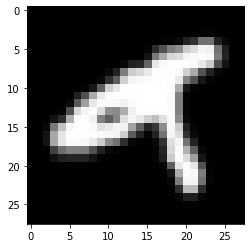

Letter: R


In [92]:
# Raw data loading
with open("../data/raw/data.npz", "rb") as f:
    data = np.load(f)
    images = data["X"]
    labels = data["Y"]
images_raw = images.copy()

# Raw image example
i = RNG.integers(0, len(images))
fig, ax = plt.subplots()
ax.imshow(images[i, 0], cmap="gray")
plt.show()
print("Letter:", letters_map[labels[i]])

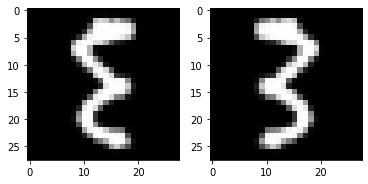

Letter: M


In [93]:
# Processing - flipping
images = np.flip(images, 3)

# Before/after
i = RNG.integers(0, len(images))
fig, axs = plt.subplots(1, 2)
axs[0].imshow(images_raw[i, 0], cmap="gray")
axs[1].imshow(images[i, 0], cmap="gray")
plt.show()
print("Letter:", letters_map[labels[i]])

  0%|          | 0/145600 [00:00<?, ?it/s]

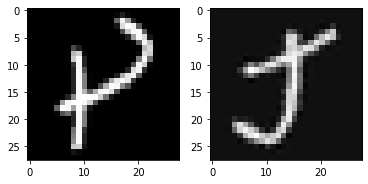

Letter: J


In [94]:
# Processing - rotation (+/- random angle)
for i in tqdm(range(len(images))):
    angle = RNG.integers(-30, 31)
    images[i, 0] = scipy.ndimage.rotate(images[i, 0], 90 + angle, reshape=False)
    
# Before/after
i = RNG.integers(0, len(images))
fig, axs = plt.subplots(1, 2)
axs[0].imshow(images_raw[i, 0], cmap="gray")
axs[1].imshow(images[i, 0], cmap="gray")
plt.show()
print("Letter:", letters_map[labels[i]])

Threshold: 172.5888301184883


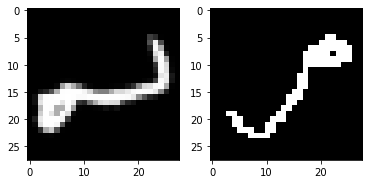

Letter: J


In [95]:
# Processing - binarization
threshold = ((np.max(images) + np.mean(images)) / 2) * (1 - 0.2 * (1 - np.std(images) / 128))
print("Threshold:", threshold)
images = np.where(images > threshold, 1.0, 0.0)

# Before/after
i = RNG.integers(0, len(images))
fig, axs = plt.subplots(1, 2)
axs[0].imshow(images_raw[i, 0], cmap="gray")
axs[1].imshow(images[i, 0], cmap="gray")
plt.show()
print("Letter:", letters_map[labels[i]])

In [96]:
# Numpy saving for future uses
with open("../data/processed/data.npz", "wb") as f:
    np.savez_compressed(f, X=images, Y=labels)